In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [15]:
def F(E, T = 1, axis = 0):
    return -np.log(np.sum(np.exp(-E/T), axis=axis))

def p(E, T = 1, axis = 0):
    return np.exp(-E/T)/np.sum(np.exp(-E/T), axis=axis)

def S(E, T = 1, axis = 0):
    return -np.sum(p(E, T, axis)*np.log(p(E, T, axis)), axis=axis)

In [79]:
experiments = {}
num_trials = 1000
for hidden_dim in [ 10000, 100, 10, 2]:
    max_p = []
    for i in range(num_trials):
        Ek = np.random.normal(0, 1, (100, hidden_dim))
        Ecomb = np.sum(Ek, axis=0)
        max_p.append(np.max(p(Ecomb, T=1)))
    experiments[hidden_dim] = max_p



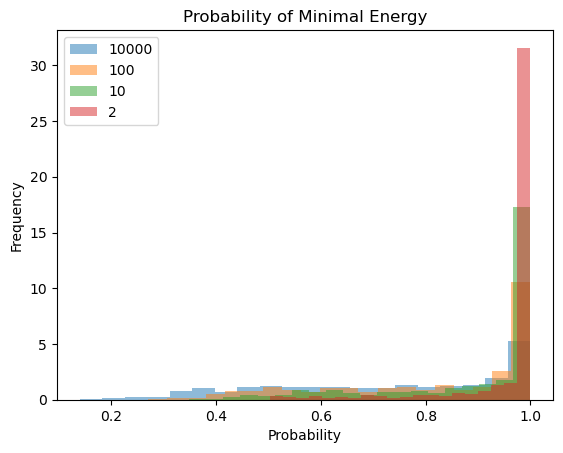

In [80]:
for hidden_dim in experiments.keys():
    plt.hist(experiments[hidden_dim], bins=20, alpha=0.5, label=str(hidden_dim), density=True)
plt.legend()
plt.title("Probability of Minimal Energy")
plt.xlabel("Probability")
plt.ylabel("Frequency")
plt.show()

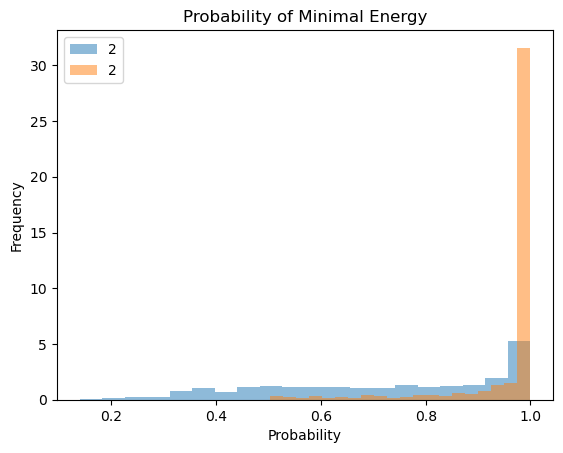

In [82]:
plt.hist(experiments[10000], bins=20, alpha=0.5, label=str(hidden_dim), density=True)
plt.hist(experiments[2], bins=20, alpha=0.5, label=str(hidden_dim), density=True)
plt.legend()
plt.title("Probability of Minimal Energy")
plt.xlabel("Probability")
plt.ylabel("Frequency")
plt.show()

# TODO

- Take GPT-2
- distribution of hidden states at different layers


In [ ]:
import matplotlib.pyplot as plt

In [29]:
import torch
import torch.nn.functional as F
from transformers import AutoTokenizer, GPT2LMHeadModel

In [30]:
tokenizer = AutoTokenizer.from_pretrained("gpt2")
model = GPT2LMHeadModel.from_pretrained("gpt2")

In [67]:
# text = "Tom and Lily were playing with their toys in the living room. They liked to build towers and bridges with their blocks and cars. "
text = "These functions will work with the hidden states output from a model like GPT-2 to give you the probability distribution and the entropy of that distribution. "

In [68]:
inputs = tokenizer(text, return_tensors="pt")
outputs = model(**inputs, labels=inputs["input_ids"], output_hidden_states=True)


In [71]:
embedding_weight = model.get_input_embeddings().weight
unembed = embedding_weight.transpose(0, 1)

def logits_from_hidden(hidden_states, unembed=unembed):
    logits_from_hidden_state = hidden_states @ unembed
    return logits_from_hidden_state

# Function to convert logits to probability distribution
def get_probability_distribution(logits):
    probabilities = F.softmax(logits, dim=-1)
    return probabilities

# Function to calculate the entropy of the probability distribution
def calculate_entropy(probabilities):
    # Make sure probabilities are not zero to avoid log(0)
    tiny = 1e-12
    probabilities = probabilities + tiny
    log_probabilities = torch.log(probabilities)
    entropy = -torch.sum(probabilities * log_probabilities, dim=-1)
    return entropy

def entropy_from_unembed_hidden(hidden_states):
    logits = logits_from_hidden(hidden_states)
    probabilities = get_probability_distribution(logits)
    entropy = calculate_entropy(probabilities)
    return entropy

def entropy_from_hidden(hidden_states):
    probabilities = get_probability_distribution(hidden_states)
    entropy = calculate_entropy(probabilities)
    return entropy



In [69]:
outputs.keys()

odict_keys(['loss', 'logits', 'past_key_values', 'hidden_states'])

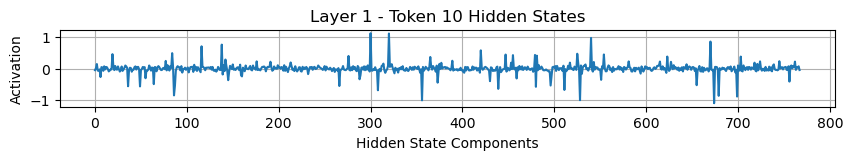

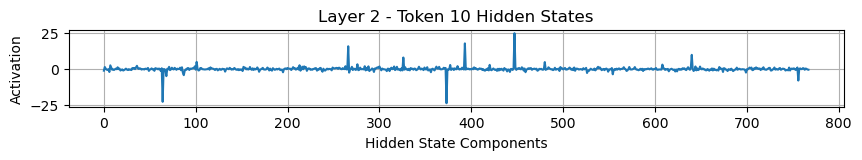

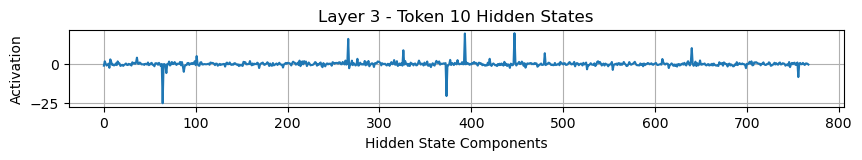

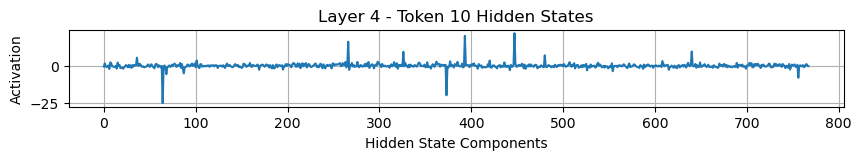

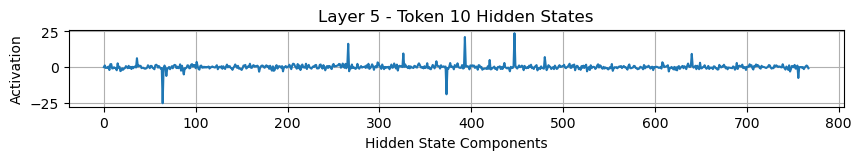

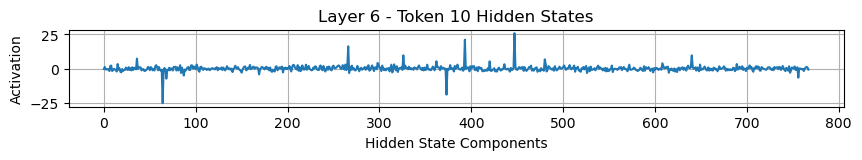

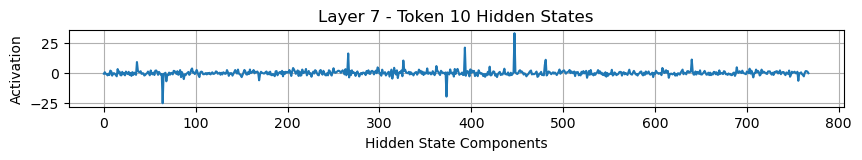

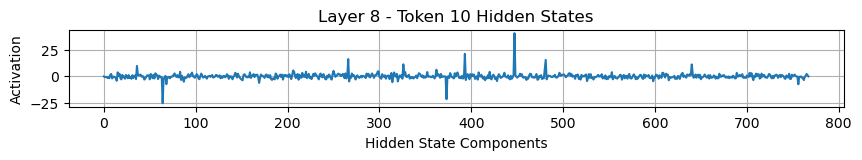

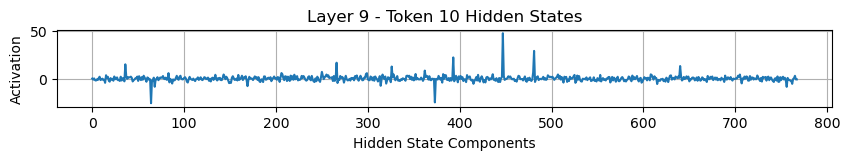

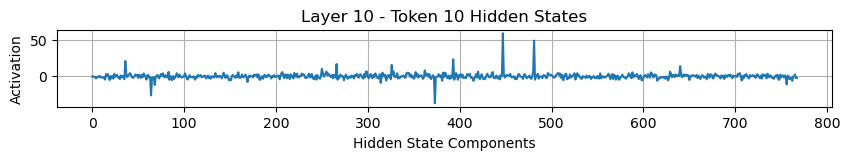

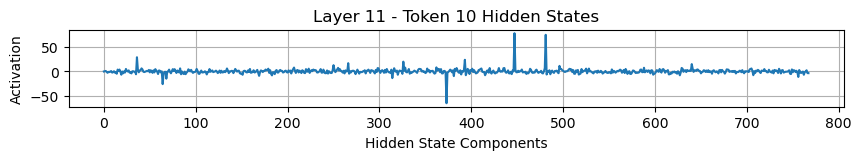

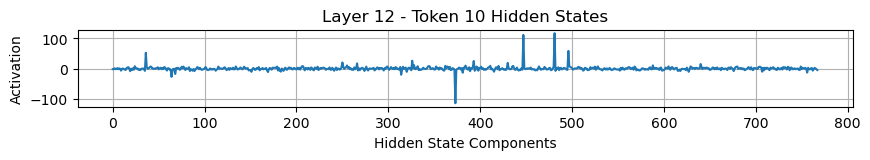

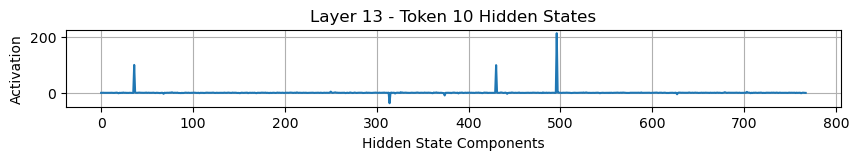

In [70]:


# Extract the hidden states
hidden_states = outputs.hidden_states

# Choose the token position k (e.g., k=3 for the fourth token)
k = 10

# Plot the hidden states for token k for each layer
for i, layer_hidden_states in enumerate(hidden_states):
    # Extract the hidden states for token k in this layer
    token_hidden_states = layer_hidden_states[0, k].detach().numpy()

    # Create a plot for this layer
    plt.figure(figsize=(10, 1))
    plt.plot(token_hidden_states)
    plt.title(f'Layer {i+1} - Token {k} Hidden States')
    plt.xlabel('Hidden State Components')
    plt.ylabel('Activation')
    plt.grid(True)
    plt.show()


In [73]:
last_hidden_states = outputs.hidden_states[-1]
# Now use the logits_from_hidden function you've defined to calculate logits
logits = logits_from_hidden(last_hidden_states)

# Convert logits to probabilities
probabilities = get_probability_distribution(logits)

# Calculate entropy
entropy = calculate_entropy(probabilities)

# This gives you the entropy of the last layer's output for each token in the input sequence

In [80]:
hidden_states[0].shape

torch.Size([1, 31, 768])

In [74]:
entropy_from_unembed_hidden(last_hidden_states)

tensor([[8.2307, 4.3538, 4.7637, 3.9759, 5.6483, 6.8588, 7.6131, 3.9871, 4.2711,
         5.3309, 7.3504, 4.4634, 6.2804, 6.3507, 5.6243, 6.8989, 4.1933, 5.7034,
         3.9696, 3.7736, 6.2504, 1.8620, 3.2103, 5.9223, 7.0943, 3.7422, 2.6144,
         3.7445, 2.0582, 3.4209, 0.8157]], grad_fn=<NegBackward0>)

In [75]:
entropy_from_hidden(last_hidden_states)

tensor([[3.1176e-04, 2.1193e-08, 2.1193e-08, 2.1193e-08, 2.1193e-08, 2.1193e-08,
         2.1193e-08, 2.1193e-08, 2.1193e-08, 2.1193e-08, 2.1193e-08, 2.1193e-08,
         2.1193e-08, 2.1193e-08, 2.1193e-08, 2.1193e-08, 2.1193e-08, 2.1193e-08,
         2.1193e-08, 2.1193e-08, 2.1193e-08, 2.1193e-08, 2.1193e-08, 2.1193e-08,
         2.1193e-08, 2.1193e-08, 2.1193e-08, 2.1193e-08, 2.1193e-08, 2.1193e-08,
         2.1193e-08]], grad_fn=<NegBackward0>)

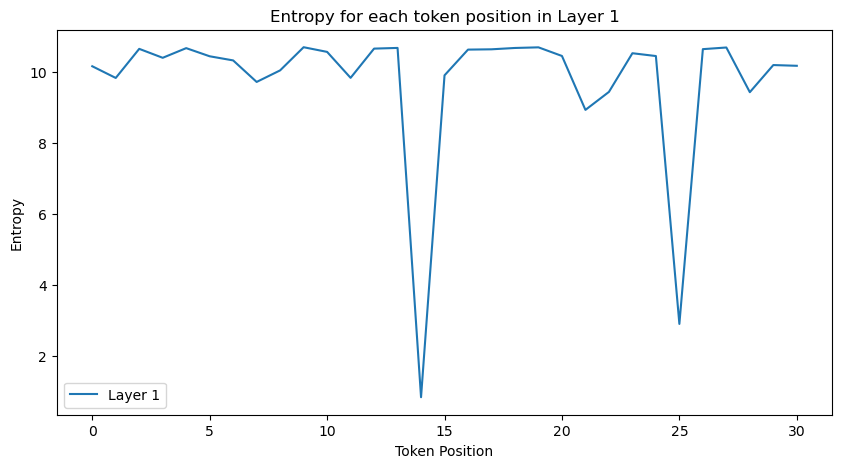

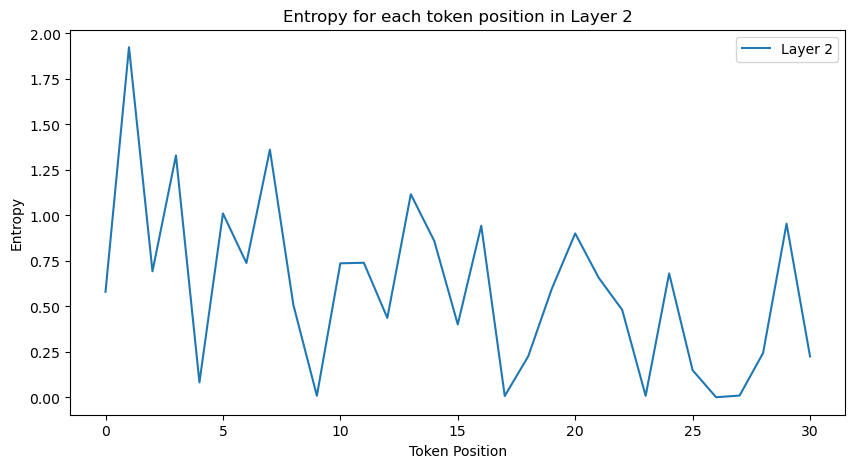

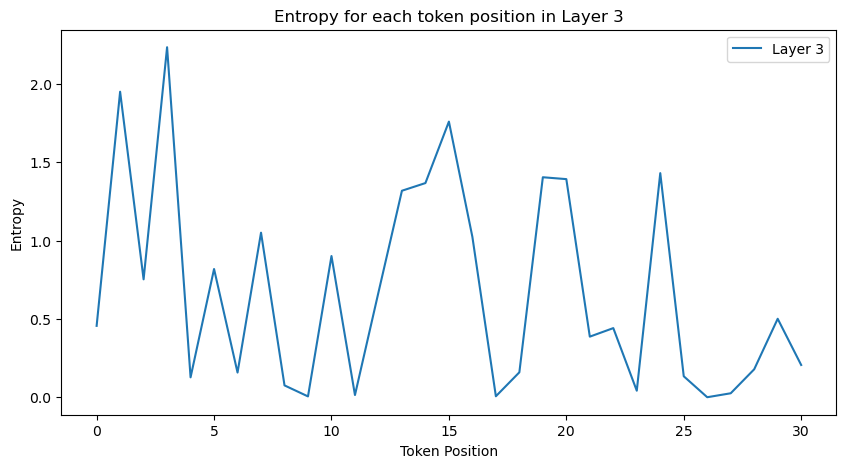

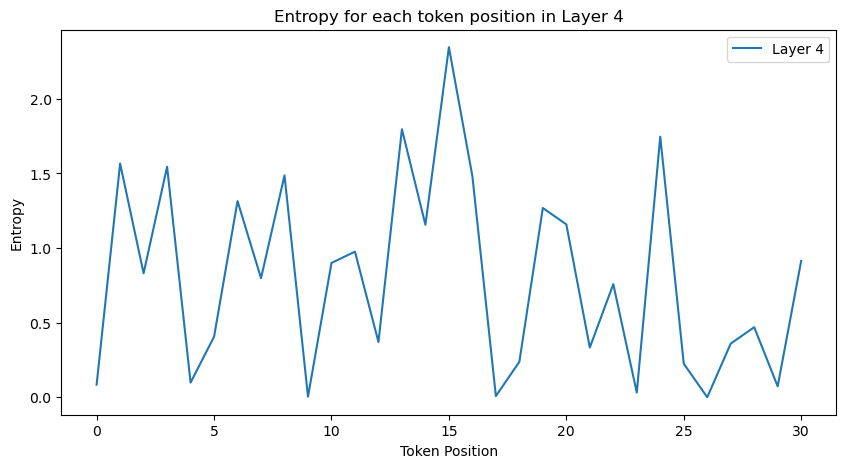

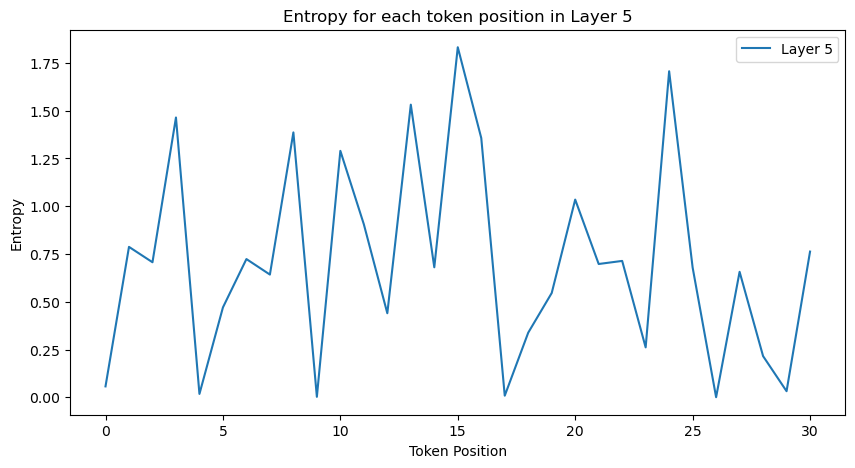

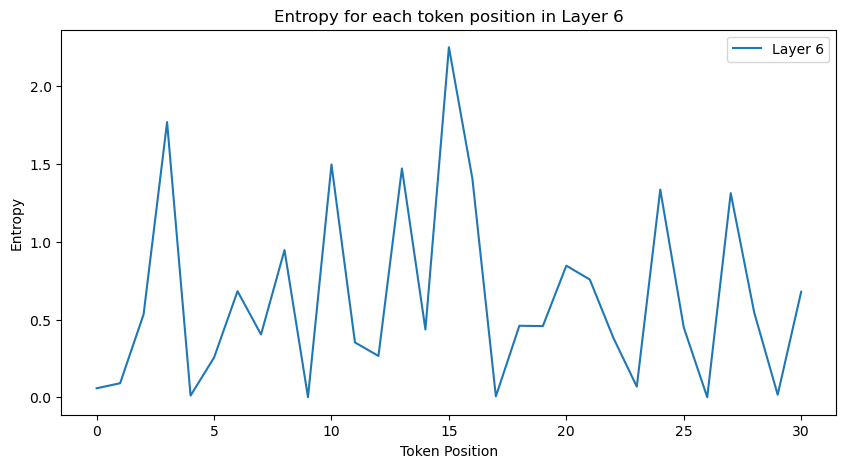

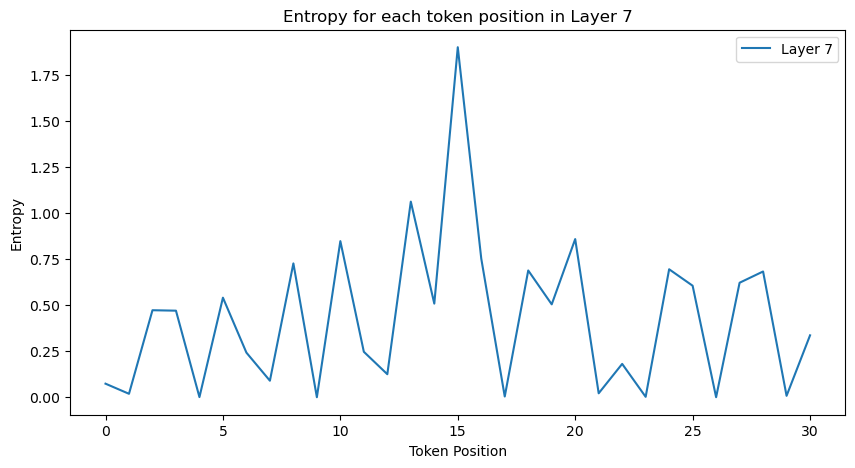

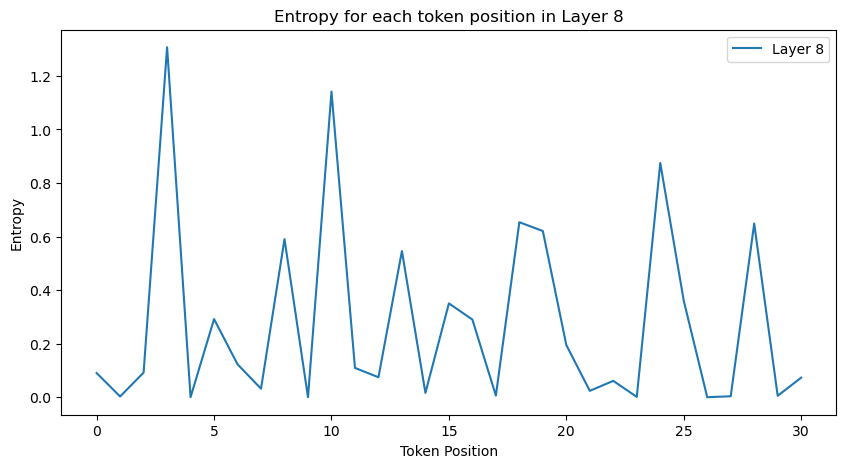

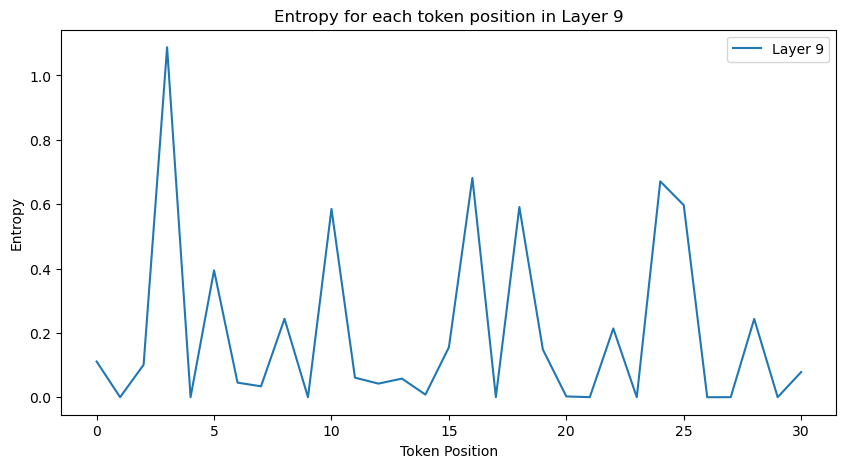

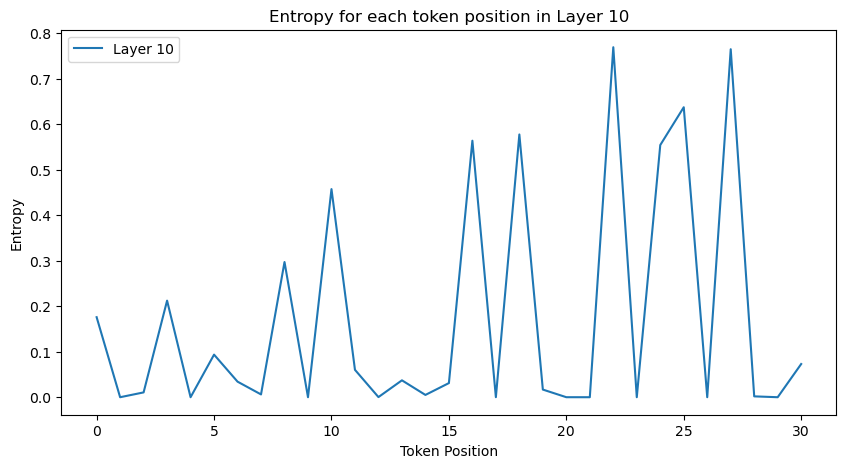

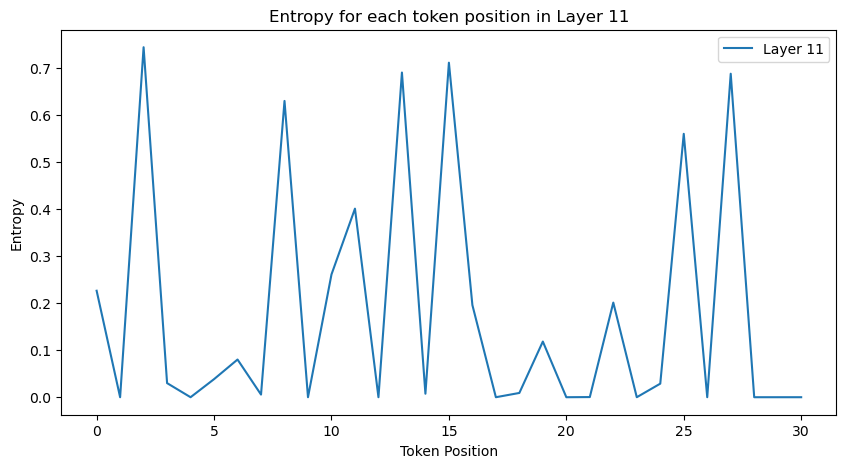

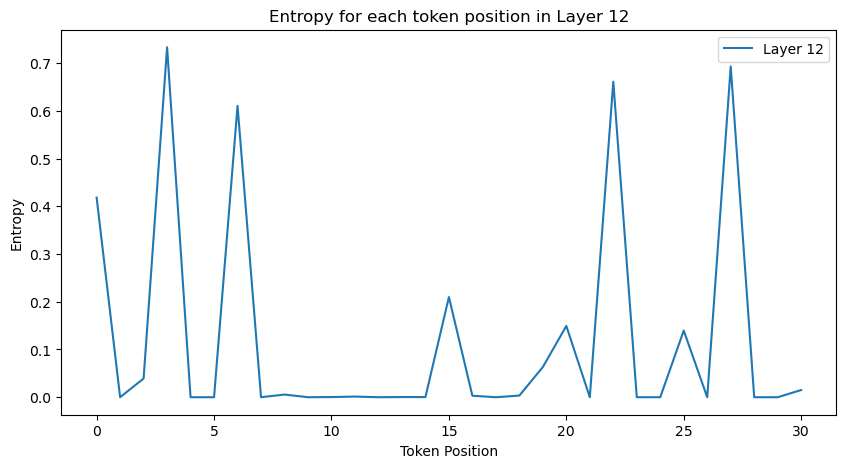

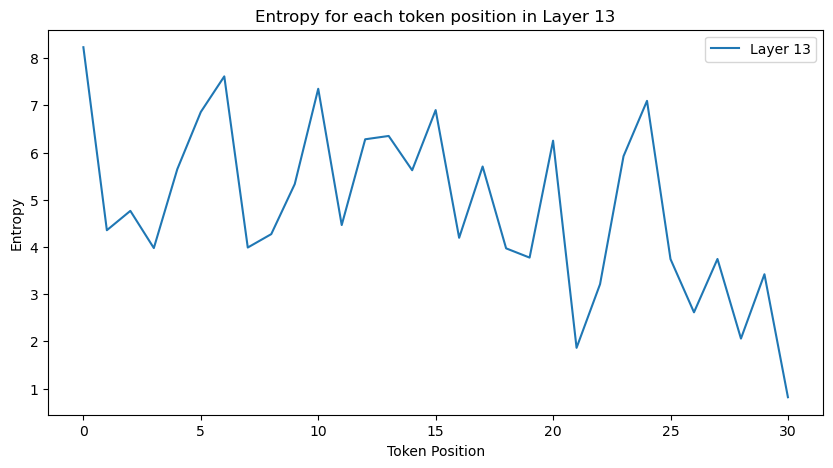

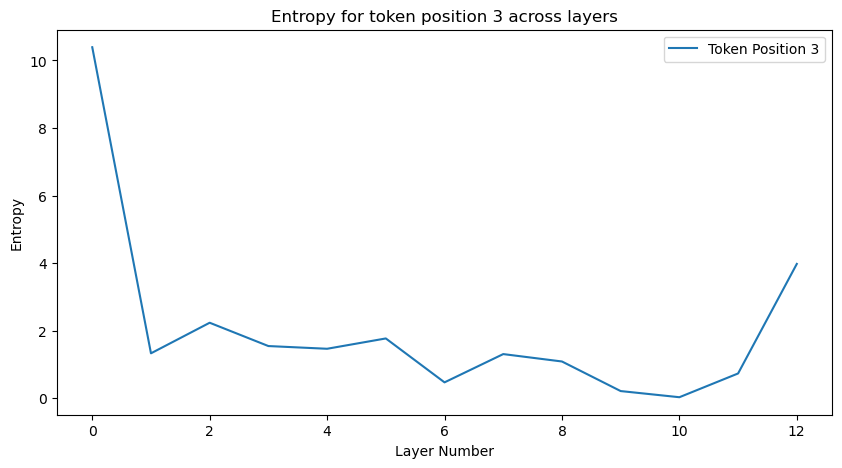

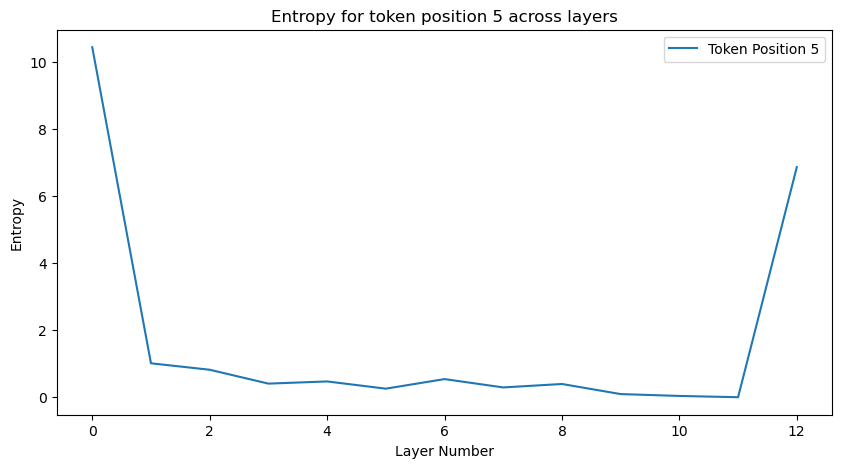

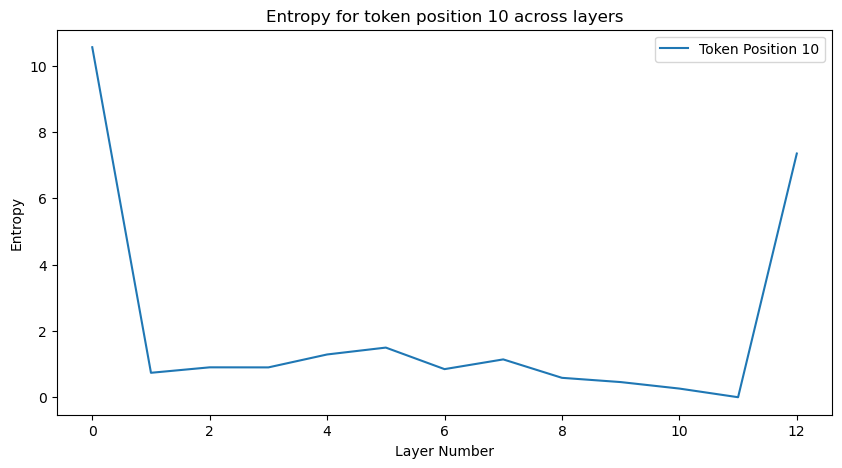

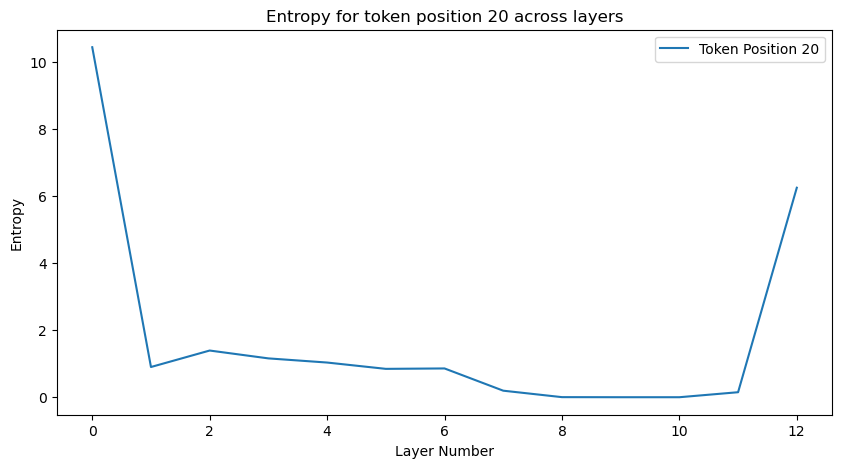

In [77]:

# Assuming hidden_states is available from your model's output as before

# Function definitions are assumed to be in the context

# Compute the entropy for all hidden states
entropies = []
for layer_hidden_states in outputs.hidden_states:
    layer_entropy = entropy_from_unembed_hidden(layer_hidden_states[0])  # Calculate entropy for this layer
    entropies.append(layer_entropy)

# Convert to a 2D tensor [num_layers x seq_length]
entropies = torch.stack(entropies)

# Plot 1: Entropy as a function of token position for each layer
for i, layer_entropy in enumerate(entropies):
    plt.figure(figsize=(10, 5))
    plt.plot(layer_entropy.detach().numpy(), label=f'Layer {i+1}')
    plt.xlabel('Token Position')
    plt.ylabel('Entropy')
    plt.title(f'Entropy for each token position in Layer {i+1}')
    plt.legend()
    plt.show()

# Plot 2: Entropy as a function of layer number for a specific token
# Choose the token position k (e.g., k=3 for the fourth token)
for k in [3, 5, 10, 20]:
    # Extract the entropies for token k
    token_entropies = entropies[:, k].detach().numpy()

    plt.figure(figsize=(10, 5))
    plt.plot(token_entropies, label=f'Token Position {k}')
    plt.xlabel('Layer Number')
    plt.ylabel('Entropy')
    plt.title(f'Entropy for token position {k} across layers')
    plt.legend()
    plt.show()
